<img src="imgs/mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S8: Contaminación en Madrid

## Objetivos:

* Experimentar con datos de Open Data Madrid.
* Trabajar con datos de localización.
* Representar la contaminación en Madrid del mes de septiembre de 2018.

**NOTA:** Actualmente Google Chrome tiene un problema al renderizar gráficos complejos con folium. Por eso **se recomienda encarecidamente** el realizar esta sesión con __[Mozilla Firefox](https://www.mozilla.org/es-ES/firefox/new/)__. Si nuestro navegador por defecto no es Firefox, podremos acceder al servidor de Jupyter Notebook una vez lo hayamos lanzado, copiando la url que contiene el token en el navegador Firefox.

<img src="imgs/notebookrun.png"/>

## Inicializamos entorno

In [1]:
import numpy as np
import pandas as pd
import re
import folium
import random

%matplotlib inline
import matplotlib.pyplot as plt 

estaciones = pd.read_csv("data/madrid_estaciones_cont.csv")
contamina = pd.read_csv('data/contamina_2018_09_diario.csv')

random.seed(1234)

Empezaremos a trabajar con los puestos de medida de la contaminación de Madrid. 

In [2]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
Unnamed: 0         0 non-null float64
NÚMERO             38 non-null object
ESTACIÓN           40 non-null object
DIRECCIÓN          40 non-null object
LONGITUD           37 non-null object
LATITUD            37 non-null object
ALTITUD            37 non-null float64
TIPO ESTACION *    37 non-null object
NO2                37 non-null object
SO2                12 non-null object
CO                 17 non-null object
PM10               14 non-null object
PM2,5              7 non-null object
O3                 23 non-null object
BTX                8 non-null object
HC                 4 non-null object
UV                 3 non-null object
VV                 6 non-null object
DV                 6 non-null object
TMP                11 non-null object
HR                 5 non-null object
PRB                3 non-null object
RS                 2 non-null object
LL                 21 non-null 

Haremos uso de la función proporcionada en el worksheet para transformar las coordenadas de grados, minutos y segundos a meridiano.

In [3]:
def convertir_coords(s):
    # https://pythex.org/
    import re
    if s is np.nan:
        return np.nan
    
    degrees, minutes, seconds, direction = re.split('[º \' "]+', s)
    seconds = seconds.replace(",", ".")
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','O'):
        dd*= -1
    
    return dd

## Preprocesamiento y exploración de los datos de sensores

Aplica las transformaciones necesarias y construye un mapa de los datos de exploración de sensores de contaminación.

In [4]:
# TU CÓDIGO AQUÍ
estaciones['Lon'] = estaciones['LONGITUD'].apply(convertir_coords)
estaciones['Lat'] = estaciones['LATITUD'].apply(convertir_coords)
estaciones[['NÚMERO', 'ESTACIÓN', 'LATITUD', 'LONGITUD', 'Lat', 'Lon']].head()

,NÚMERO,ESTACIÓN,LATITUD,LONGITUD,Lat,Lon
0,4,Pza. de España,"40º 25' 25,87''N","3º 42' 44,09''O",40.423853,-3.712247
1,8,Escuelas Aguirre,"40º 25' 17,63''N","3º 40' 56,35''O",40.421564,-3.682319
2,11,Avda. Ramón y Cajal,"40º 27' 05,31''N","3º 40' 38,48''O",40.451475,-3.677356
3,16,Arturo Soria,"40º 26' 24,17''N","3º 38' 21,24''O",40.440047,-3.639233
4,17,Villaverde,"40º 20' 49,70''N","3º 42' 47,96''O",40.347139,-3.713322


In [5]:
estaciones[estaciones['Lat'].isna()]
estaciones = estaciones[~estaciones['Lat'].isna()]

In [6]:
#MADRID_COORDS = [40.4167,  -3.70325]
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
m

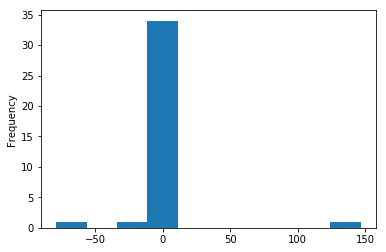

In [7]:
estaciones['Lon'].plot(kind = "hist")

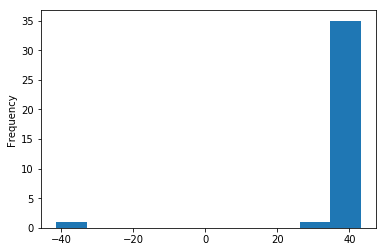

In [8]:
estaciones['Lat'].plot(kind = "hist")

In [9]:
estaciones = estaciones[estaciones['Lat'] > 30]
#estaciones = estaciones[estaciones['Lat'] > -1] 
#estaciones = estaciones[estaciones['Lat'] < 100]

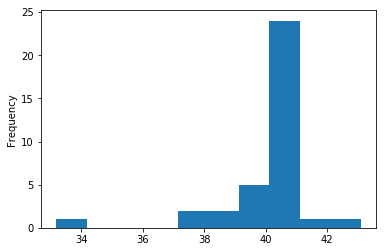

In [10]:
estaciones['Lat'].plot(kind = "hist")

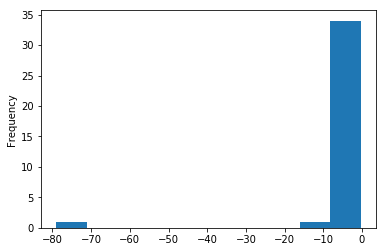

In [11]:
estaciones['Lon'].plot(kind = "hist")

## Representación de contaminación durante el mes de septiembre

Preprocesa y representa los datos de contaminación en Madrid para el mes de septiembre. Tienes los datos cargados en la variable `contamina`.

In [12]:
# TU CÓDIGO AQUÍ
contamina.info()
x = estaciones[['NÚMERO','ESTACIÓN', 'LATITUD', 'LONGITUD', 'Lat', 'Lon']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
ESTACION    720 non-null int64
MAGNITUD    720 non-null int64
ANO         720 non-null int64
MES         720 non-null int64
DIA         720 non-null int64
H08         720 non-null float64
dtypes: float64(1), int64(5)
memory usage: 33.8 KB


In [13]:
contamina.columns = ['NÚMERO', 'MAGNITUD', 'ANO', 'MES', 'DIA', 'H08']

In [14]:
contamina['NÚMERO']=contamina['NÚMERO'].astype(str)

In [15]:
x['NÚMERO']=x['NÚMERO'].astype(str)

In [16]:
result = pd.merge(contamina, x, on='NÚMERO')

In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 11 columns):
NÚMERO      150 non-null object
MAGNITUD    150 non-null int64
ANO         150 non-null int64
MES         150 non-null int64
DIA         150 non-null int64
H08         150 non-null float64
ESTACIÓN    150 non-null object
LATITUD     150 non-null object
LONGITUD    150 non-null object
Lat         150 non-null float64
Lon         150 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 14.1+ KB


In [18]:
MADRID_COORDS = [40.4167,  -3.70325]
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in result.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'],
                            fill_color="#3db7e4",
                           ).add_to(m)
m

In [19]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in result.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            fill_color="#3db7e4",
                           ).add_to(m)
        
# convertimos coordenadas a array de dos dimensiones
stationArr = estaciones[['Lat', 'Lon']].values

# ploteamos heatmap
from folium import plugins
m.add_child(plugins.HeatMap(stationArr, radius=25))
m

## Optimización de rutas

En el worksheet hemos hablado de optimización de rutas como un problema recurrente sobretodo para operaciones logísticas. Lamentablemente, no somos capaces de hacerlo por fuerza bruta en problemas grandes y tampoco sin distancias de ruta por carretera reales. Sin embargo, sí que tenemos la distancia haversine.

Imagina que después de una tormenta eléctrica, todos los dispositivos de medición de contaminación en Madrid se han estropeado y que eres el técnico encargado de repararlos. Si la central del técnico está situada en el punto origen propuesto, construye un algoritmo que calcule la ruta óptima, siendo esta la que más sensores permita reparar en menor tiempo posible y obtén la distancia total recorrida.

Estructura del algoritmo propuesta:
* Establecer punto de origen
* Repetir hasta que no queden puntos por visitar:
    * Calcular desde el punto actual la distancia a todos los puntos restantes.
    * Escoger el punto más cercano.
    * Marcar ese punto como punto ya visitado. No queremos visitar un mismo punto varias veces.
    * Establecer como nuevo punto de origen el seleccionado como más cercano.
* Una vez no queden más puntos por visitar, calcula la distancia de vuelta directamente a la central del técnico.

¿Serías capaz de pintar esta ruta en un mapa de folium?

In [20]:
ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radio de la tierra en km.
    
    return c * r

In [21]:
estaciones = estaciones[estaciones['Lon'] > -10.]
estaciones = estaciones[estaciones['Lon'] < 10.]


estaciones = estaciones[estaciones['Lat'] > 40.]

In [22]:
estaciones = estaciones[['NÚMERO','ESTACIÓN', 'Lon', 'Lat']]
estaciones_final = estaciones[['NÚMERO', 'Lon', 'Lat']]
estaciones = estaciones.drop_duplicates()
estaciones = estaciones.dropna()

In [23]:
estaciones = np.array(estaciones)

In [24]:
estaciones_final = estaciones_final.astype(float)
estaciones_final = np.array(estaciones_final)

In [25]:
i=0

# prev_distance = 0
distancia_final = []
est = []
min_distance = []
origen = 0

while i < len(estaciones):
    array_distance = [0]
    n=0
    if origen == 0:
        while n < len(estaciones):
            distance = haversine(ORIGEN_COORDS[0], ORIGEN_COORDS[1], estaciones[n][2], estaciones[n][3])
            print(distance)
            array_distance = np.append(array_distance, distance)
            n +=1
    else:
        while n < len(estaciones):
            distance = haversine(estaciones[i][2], estaciones[i][3], estaciones[n][2], estaciones[n][3])
            print(distance)
            array_distance = np.append(array_distance, distance)
            n +=1   
     
    x = np.argmin(array_distance)
    pos = [estaciones[x][2], estaciones[x][3]]
    #array_distance = np.delete(array_distance, distance)
    np.append(min_distance, np.min(array_distance))
    distancia_final.append(pos)
    estaciones = np.delete(estaciones, x, axis = 0)
    i +=1

6643.973969208529
6641.785882487921
6643.427223444125
6640.078751105139
6638.978089643734
6643.387822576373
6646.0664837420145
6638.501287056304
6643.049228739335
6638.366480251749
6645.059824505355
6647.52164773197
6637.479552791144
6640.54165185869
6643.546101428761
6641.332923575399
6645.136148774755
6633.7901496717395
6637.595001558209
6641.845171856327
6645.111034906893
6654.442856352529
6639.69897123097
6647.521052251699
6641.785882487921
6643.427223444125
6640.078751105139
6638.978089643734
6643.387822576373
6646.0664837420145
6638.501287056304
6643.049228739335
6638.366480251749
6645.059824505355
6647.52164773197
6637.479552791144
6640.54165185869
6643.546101428761
6641.332923575399
6645.136148774755
6633.7901496717395
6637.595001558209
6641.845171856327
6645.111034906893
6654.442856352529
6639.69897123097
6647.521052251699
6643.427223444125
6640.078751105139
6638.978089643734
6643.387822576373
6646.0664837420145
6638.501287056304
6643.049228739335
6638.366480251749
6645.059824

In [26]:
n = 0
numeros = []
while n<len(estaciones):
    if estaciones[n][2] == distancia_final[n][0]:
        numeros.append(estaciones[n][0])
    n+=1

In [27]:
MADRID_COORDS = [40.4425, -3.6950]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for i, e in enumerate(distancia_final):
    folium.CircleMarker([e[1], e[0]],
                    radius=2,
                    fill_color="#3db7e4",
                   ).add_to(m)

path = []
for i in range(len(distancia_final)):
    path.append([distancia_final[i][1], distancia_final[i][0]])

folium.PolyLine(path, color="blue", weight=2.5, opacity=1).add_to(m)
folium.Marker(path[0]).add_to(m)

m

Compara ahora tu resultado con el resultado de OR-Tools. Recuerda que necesitas llamar a la función ```optimize_route_by_distance``` que requiere los siguientes parámetros:
* Lista de localizaciones en coordenadas GPS.
* Lista de nombres de las localizaciones en el mismo orden.
* Localización de salida de los vehículos. Es el índice de uno de los puntos de localización. Siendo 0 el primer elemento, 1 el segundo, etc...
* Número de vehículos, en este caso sólo uno.

In [28]:
#LonLat = estaciones [['ESTACION','Lon', 'Lat']]

In [29]:
from optimizer import *

ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

# TU CÓDIGO AQUÍ
locations = []
origin = ORIGEN_COORDS
names = []

for i in range(len(estaciones_final)):
    names.append(estaciones_final[i][0])
    locations.append([estaciones_final[i][2], estaciones_final[i][1]])

path = optimize_route_by_distance(locations, names, origin=13, n_vehicles = 1)

Computing distance matrix...
Creating data model...
Solving...


Route for vehicle 0:
 13 -> 15 -> 1 -> 12 -> 17 -> 9 -> 3 -> 18 -> 7 -> 22 -> 20 -> 23 -> 21 -> 11 -> 16 -> 2 -> 14 -> 10 -> 8 -> 0 -> 6 -> 5 -> 19 -> 4 -> 13
Distance of route: 80 km

Total distance of all routes: 80 km
Plan for vehicle 0:[13]: 47.0 ->[15]: 49.0 ->[1]: 8.0 ->[12]: 40.0 ->[17]: 54.0 ->[9]: 36.0 ->[3]: 16.0 ->[18]: 55.0 ->[7]: 27.0 ->[22]: 59.0 ->[20]: 57.0 ->[23]: 60.0 ->[21]: 58.0 ->[11]: 39.0 ->[16]: 50.0 ->[2]: 11.0 ->[14]: 48.0 ->[10]: 38.0 ->[8]: 35.0 ->[0]: 4.0 ->[6]: 24.0 ->[5]: 18.0 ->[19]: 56.0 ->[4]: 17.0 ->[0]: 4.0


¿Serías capaz de mostrarla en folium para comparar?

In [30]:
MADRID_COORDS = [40.4425, -3.6950]
m = folium.Map(MADRID_COORDS, zoom_start=11.25)

for i, e in enumerate(locations):
    folium.CircleMarker([e[0], e[1]],
                    radius=2,
                    fill_color="#3db7e4",
                   ).add_to(m)

folium.PolyLine(locations).add_to(m)
folium.Marker(locations[13]).add_to(m)

m